# 0) Установка библиотек

In [ ]:
!pip install catboost

In [ ]:
!pip install phik

In [ ]:
!pip install xgboost

In [ ]:
!pip install category_encoders

# 1) EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier , RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from phik.report import plot_correlation_matrix
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier



train = pd.read_csv('/content/drive/MyDrive/shift_winter/train.csv',delimiter=',')
test = pd.read_csv('/content/drive/MyDrive/shift_winter/test.csv',delimiter=',')

train

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Chirag,Male,29.0,Lucknow,Student,NaN,3.0,NaN,8.59,2.0,NaN,7-8 hours,Moderate,MA,Yes,1.0,3.0,No,1
1,Armaan,Male,57.0,Mumbai,Working Professional,Marketing Manager,NaN,5.0,NaN,NaN,3.0,More than 8 hours,Healthy,B.Com,No,4.0,2.0,No,0
2,Anirudh,Male,56.0,Kalyan,Working Professional,HR Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Unhealthy,MCA,No,1.0,1.0,Yes,0
3,Vivan,Male,56.0,Varanasi,Working Professional,Pharmacist,NaN,3.0,NaN,NaN,3.0,5-6 hours,Unhealthy,MBBS,Yes,9.0,5.0,No,0
4,Ritik,Male,38.0,Kalyan,Working Professional,Data Scientist,NaN,4.0,NaN,NaN,1.0,More than 8 hours,Healthy,BE,Yes,2.0,2.0,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98485,Shiv,Male,60.0,Mumbai,Working Professional,Teacher,NaN,3.0,NaN,NaN,2.0,7-8 hours,Unhealthy,B.Arch,No,0.0,2.0,Yes,0
98486,Aaradhya,Female,56.0,Vasai-Virar,Working Professional,NaN,NaN,2.0,NaN,NaN,3.0,More than 8 hours,Moderate,Class 12,No,10.0,3.0,Yes,0
98487,Diya,Female,60.0,Meerut,Working Professional,Teacher,NaN,3.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,MD,Yes,9.0,1.0,Yes,0
98488,Rupak,Male,21.0,Kalyan,Student,NaN,5.0,NaN,8.62,1.0,NaN,7-8 hours,Unhealthy,B.Arch,Yes,8.0,2.0,No,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98490 entries, 0 to 98489
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   98490 non-null  object 
 1   Gender                                 98490 non-null  object 
 2   Age                                    98490 non-null  float64
 3   City                                   98490 non-null  object 
 4   Working Professional or Student        98490 non-null  object 
 5   Profession                             72751 non-null  object 
 6   Academic Pressure                      19545 non-null  float64
 7   Work Pressure                          78932 non-null  float64
 8   CGPA                                   19545 non-null  float64
 9   Study Satisfaction                     19544 non-null  float64
 10  Job Satisfaction                       78936 non-null  float64
 11  Sl

In [ ]:
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения ({len(unique_values)}): {unique_values}")
    print("-" * 50)

Столбец: Name
Уникальные значения (363): ['Chirag' 'Armaan' 'Anirudh' 'Vivan' 'Ritik' 'Aaradhya' 'Naina' 'Zoya'
 'Nishant' 'Abhinav' 'Aarav' 'Divya' 'Aditya' 'Vidhi' 'Rashi' 'Shlok'
 'Rupal' 'Arnav' 'Ira' 'Rohan' 'Sanya' 'Ayaan' 'Kunal' 'Advait'
 'Raghavendra' 'Vaishnavi' 'Pranav' 'Kashish' 'Ishaani' 'Anjali' 'Anand'
 'Aryan' 'Tushar' 'Aarti' 'Zara' 'Ishan' 'Anushka' 'Pari' 'Sanket' 'Rahil'
 'Vihaan' 'Gauri' 'Aditi' 'Barkha' 'Ila' 'Vrinda' 'Arjun' 'Navya' 'Aahana'
 'Esha' 'Siddhi' 'Harsha' 'Yashvi' 'Siddhesh' 'Ayush' 'Atharv' 'Abhishek'
 'Palak' 'Arya' 'Ivaan' 'Aariv' 'Prisha' 'Nikita' 'Aniket' 'Damini' 'Arav'
 'Pihu' 'Shiv' 'Kartik' 'Darsh' 'Tara' 'Garima' 'Tejas' 'Mahi' 'Anvi'
 'Leela' 'Pratyush' 'Rishi' 'Yamini' 'Keshav' 'Pooja' 'Vidya' 'Vani'
 'Nirvaan' 'Jhanvi' 'Kiran' 'Jiya' 'Yogesh' 'Shreya' 'Monika' 'Kush'
 'Ritika' 'Nalini' 'Kartikeya' 'Vanya' 'Ranveer' 'Nandini' 'Aanchal'
 'Shruti' 'Saanvi' 'Riya' 'Rupak' 'Pallavi' 'Virat' 'Saurav' 'Aishwarya'
 'Shivam' 'Vivaan' 'Harsh' 'Yash

Классы несбалансированны

In [ ]:
train['Depression'].value_counts()

,count
Depression,
0,80593
1,17897


Удаление столбцов, которые не влияют на целевую переменную или ухудшают метрики

In [ ]:
train = train.drop('City', axis=1)
train = train.drop('Degree', axis=1)
train = train.drop('Gender', axis=1)
train = train.drop('CGPA', axis=1)
train = train.drop('Name', axis=1)

Заполнение 0 столбцов Work B Academic Pressure в зависимости от того, студент это или работник. Также добавление новой профессии - студент

In [ ]:
train.loc[train['Working Professional or Student'] == 'Working Professional', 'Academic Pressure'] = 0
train.loc[train['Working Professional or Student'] == 'Student', 'Work Pressure'] = 0
train.loc[train['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'

In [ ]:
train[train['Working Professional or Student'] == 'Student'].isna().sum()

,0
Age,0
Working Professional or Student,0
Profession,0
Academic Pressure,6
Work Pressure,0
Study Satisfaction,7
Job Satisfaction,19542
Sleep Duration,0
Dietary Habits,2
Have you ever had suicidal thoughts ?,0


In [ ]:
train[train['Working Professional or Student'] == 'Working Professional'].isna().sum()

,0
Age,0
Working Professional or Student,0
Profession,6216
Academic Pressure,0
Work Pressure,14
Study Satisfaction,78939
Job Satisfaction,12
Sleep Duration,0
Dietary Habits,2
Have you ever had suicidal thoughts ?,0


Заполнение соответсвующих nan значений медианой у студентов в стобцах связанных с учебой, у работающих в столбцах связанных с работой

In [ ]:
std_mid = train['Study Satisfaction'].median()
acd_mid = train['Academic Pressure'].median()
job_mid = train['Job Satisfaction'].median()
work_mid = train['Work Pressure'].median()

In [ ]:
train.loc[(train['Study Satisfaction'].isna()) & (train['Working Professional or Student']  == 'Student'), 'Study Satisfaction'] = std_mid
train.loc[(train['Academic Pressure'].isna()) & (train['Working Professional or Student']  == 'Student'), 'Academic Pressure'] = acd_mid
train.loc[(train['Job Satisfaction'].isna()) & (train['Working Professional or Student']  == 'Working Professional'), 'Job Satisfaction'] = job_mid
train.loc[(train['Work Pressure'].isna()) & (train['Working Professional or Student']  == 'Working Professional'), 'Work Pressure'] = work_mid

In [ ]:
train[train['Working Professional or Student'] == 'Student'].isna().sum()

,0
Age,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
Study Satisfaction,0
Job Satisfaction,19542
Sleep Duration,0
Dietary Habits,2
Have you ever had suicidal thoughts ?,0


In [ ]:
train[train['Working Professional or Student'] == 'Working Professional'].isna().sum()

,0
Age,0
Working Professional or Student,0
Profession,6216
Academic Pressure,0
Work Pressure,0
Study Satisfaction,78939
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,2
Have you ever had suicidal thoughts ?,0


Кодирование профессий с помощью Label Encoding

In [ ]:
label_encoder = LabelEncoder()

label_encoder.fit(train['Profession'].fillna('Unknown'))

train['Profession'] = label_encoder.transform(train['Profession'].fillna('Unknown'))

In [ ]:
train['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,27181
7-8 hours,25899
More than 8 hours,22824
5-6 hours,22523
3-4 hours,8
6-7 hours,8
4-5 hours,5
4-6 hours,5
No,4


Удаление неадекватных значений в Sleep Duration (улудшает модель)

In [ ]:
condition = ['5-6 hours','More than 8 hours','7-8 hours','Less than 5 hours']
#замена на среднее ухудшает модель
'''median_value = '5-6 hours'
train['Sleep Duration'] = train['Sleep Duration'].apply(lambda x: x if x in condition else median_value)'''
train=train[train['Sleep Duration'].isin(condition)]

In [ ]:
train['Dietary Habits'].value_counts()

,count
Dietary Habits,
Moderate,34741
Unhealthy,32415
Healthy,31250
Yes,2
More Healthy,2
Less Healthy,1
Gender,1
3,1
Hormonal,1


Удаление неадекватных значений в Dietary Habits (улудшает модель)

In [ ]:
condition = ['Moderate', 'Healthy', 'Unhealthy']
#замена на среднее ухудшает модель
'''median_value = 'Moderate'
train['Dietary Habits'] = train['Dietary Habits'].apply(lambda x: x if x in condition else median_value)'''
train=train[train['Dietary Habits'].isin(condition)]

In [ ]:
train = train.fillna(0)

Кодирование фичей с помощью Mapping

In [ ]:
mapping = {
    'Yes': 1,
    'No': 0,
    '5-6 hours': 5.5,
    'More than 8 hours': 9,
    '7-8 hours': 7.5,
    'Less than 5 hours': 4,
    'Student':1,
    'Working Professional':2,
    'Healthy':3,
    'Unhealthy':1,
    'Moderate':2
}

train['Have you ever had suicidal thoughts ?'] = train['Have you ever had suicidal thoughts ?'].map(mapping)
train['Sleep Duration']=train['Sleep Duration'].map(mapping)
train['Family History of Mental Illness']=train['Family History of Mental Illness'].map(mapping)
train['Dietary Habits']=train['Dietary Habits'].map(mapping)
train['Working Professional or Student']=train['Working Professional or Student'].map(mapping)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98406 entries, 0 to 98489
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    98406 non-null  float64
 1   Working Professional or Student        98406 non-null  float64
 2   Profession                             98406 non-null  int64  
 3   Academic Pressure                      98406 non-null  float64
 4   Work Pressure                          98406 non-null  float64
 5   Study Satisfaction                     98406 non-null  float64
 6   Job Satisfaction                       98406 non-null  float64
 7   Sleep Duration                         98406 non-null  float64
 8   Dietary Habits                         98406 non-null  float64
 9   Have you ever had suicidal thoughts ?  98406 non-null  float64
 10  Work/Study Hours                       98406 non-null  float64
 11  Financi

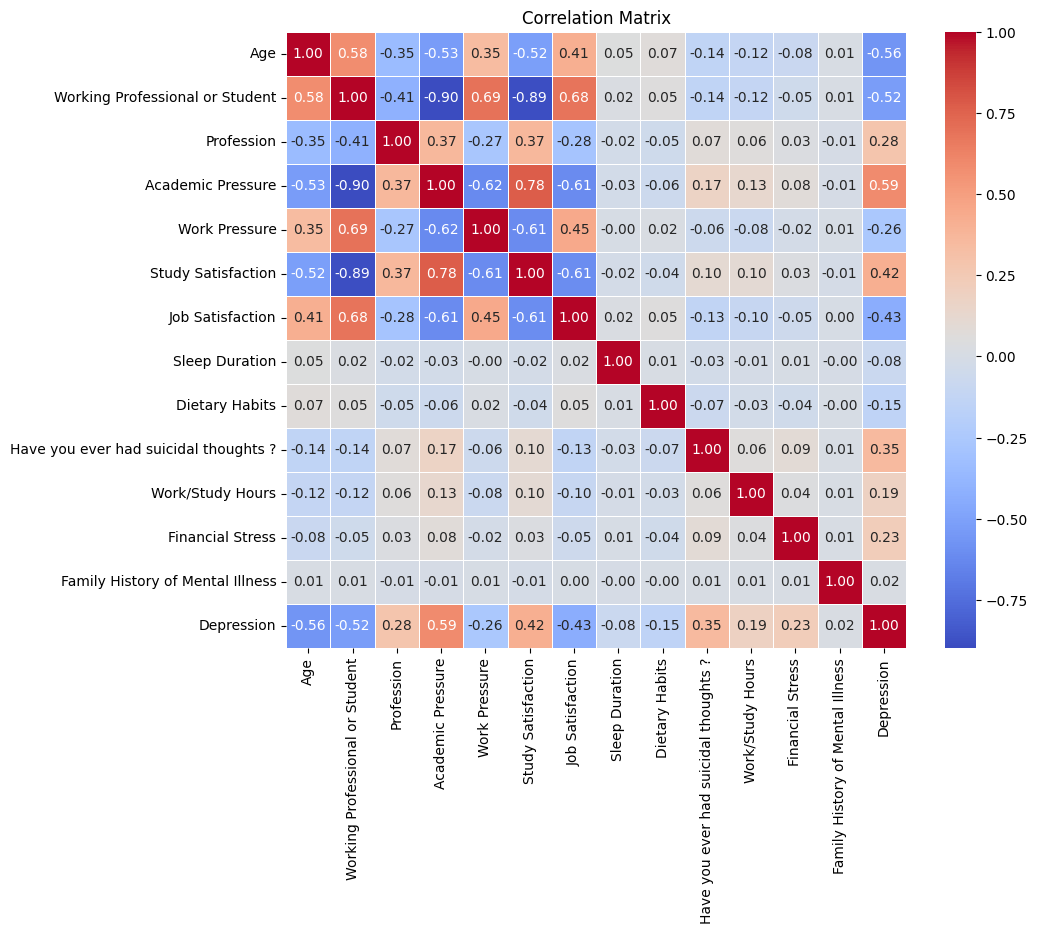

In [ ]:
corr_matrix = train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

interval columns not set, guessing: ['Age', 'Working Professional or Student', 'Profession', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


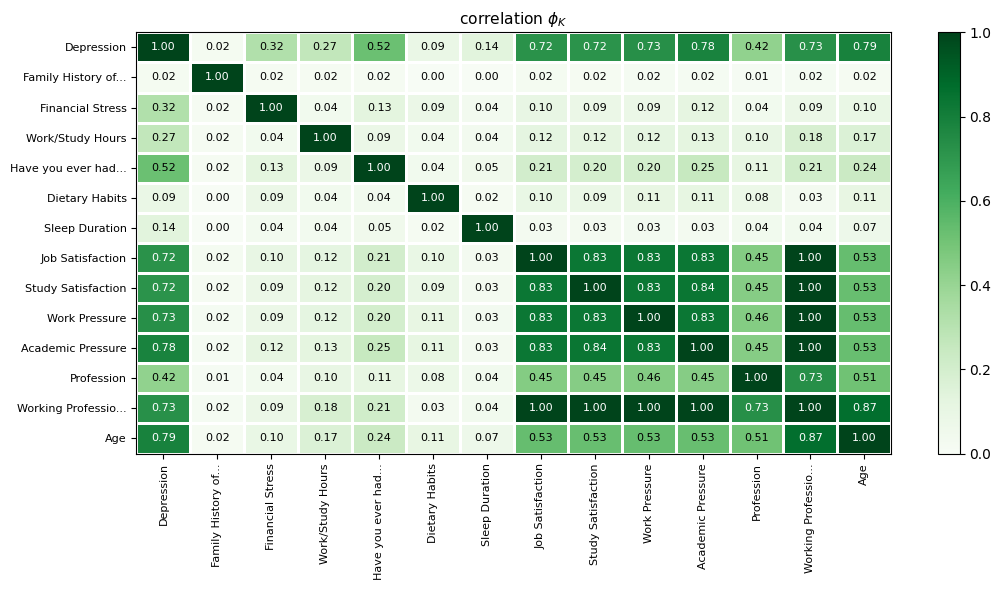

In [ ]:
phik_overview = train.phik_matrix()

plt=plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation $\phi_K$",
                        fontsize_factor=0.8, figsize=(11, 6))

Создание признаков свободное время, проблемы в учебе и проблемы на работе

In [ ]:
train['Free time'] = 24 - train['Sleep Duration']-train['Work/Study Hours']

In [ ]:
train['Problem_student'] = np.where(
    train['Academic Pressure'] == 0,
    0,
    train['Academic Pressure'] + train['Financial Stress'] + train['Study Satisfaction'] + train['Have you ever had suicidal thoughts ?'] + train['Family History of Mental Illness']
)

In [ ]:
train['Problem_work'] = np.where(
    train['Work Pressure'] == 0,
    0,
    -train['Work Pressure'] + train['Financial Stress'] - train['Job Satisfaction']+ train['Have you ever had suicidal thoughts ?'] + train['Family History of Mental Illness']
)

Неудачне попытки создать признак проблем в учебе и на работе (метрики становились хуже)

In [ ]:
#train['Problem_student'] = train['Academic Pressure'] + train['Financial Stress'] + train['Study Satisfaction'] + train['Have you ever had suicidal thoughts ?'] + train['Family History of Mental Illness']

In [ ]:
#train['Problem_work'] = -train['Work Pressure'] + train['Financial Stress'] - train['Job Satisfaction']+ train['Have you ever had suicidal thoughts ?'] + train['Family History of Mental Illness']

Деление возрастов на категории (не дало результатов)

In [ ]:
#train.loc[train['Age'] < 35, 'Age'] = 2
#train.loc[(train['Age'] >= 35) & (train['Age'] < 52), 'Age'] = 1
#train.loc[train['Age'] >= 52, 'Age'] = 0

Создание признака - плохое ментальное состояние (ухудшило модель)

In [ ]:
'''train['bad mental'] = ((train['Have you ever had suicidal thoughts ?'] + train['Family History of Mental Illness']) == 2) & (train['Financial Stress'] >= 3)

train['bad mental'] = train['bad mental'].astype(int)'''

"train['bad mental'] = ((train['Have you ever had suicidal thoughts ?'] + train['Family History of Mental Illness']) == 2) & (train['Financial Stress'] >= 3)\n\ntrain['bad mental'] = train['bad mental'].astype(int)"

Попытки создания категориальных признаков проблемы в учебе и на работе (ухудшило модель)

In [ ]:
#train['bad_academy'] = np.where((train['Academic Pressure'] >= 4) & (train['Study Satisfaction'] <= 2), 1, 0)

In [ ]:
#train['bad_job'] = np.where((train['Work Pressure'] >= 4) & (train['Job Satisfaction'] <= 2), 1, 0)

Разделение датасета на тренировочную и валидационную выборку, а также применение target encoding к категориальным фичам.

In [ ]:
X = train.drop(columns=["Depression"])
y = train["Depression"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = ce.TargetEncoder(cols=[
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
    'Working Professional or Student'
])
X_train = encoder.fit_transform(X_train, y_train)

X_test = encoder.transform(X_test)

# 2) Выбор модели, ее обучение и подбор гиперпараметров

Проверка моделей без гиперпараметров

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=2000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    results.append({"Model": model_name, "F1-Score": f1, "ROC-AUC": roc_auc})

for result in results:
    print(f"{result['Model']}: F1-Score = {result['F1-Score']:.6f}, ROC-AUC = {result['ROC-AUC']:.6f}")

Logistic Regression: F1-Score = 0.829081, ROC-AUC = 0.975207
Random Forest: F1-Score = 0.817230, ROC-AUC = 0.969832
XGBoost: F1-Score = 0.826864, ROC-AUC = 0.973533
CatBoost: F1-Score = 0.829361, ROC-AUC = 0.975312


Без гиперпараметров:

Logistic Regression: F1-Score = 0.829081, ROC-AUC = 0.975207

Random Forest: F1-Score = 0.817230, ROC-AUC = 0.969832

XGBoost: F1-Score = 0.826864, ROC-AUC = 0.973533

CatBoost: F1-Score = 0.829361, ROC-AUC = 0.975312

Подбор гиперпараметров для CatBoost, для логистической регрессии параметры подобраны также с помощью GridSearch

In [ ]:
'''model = CatBoostClassifier(learning_rate=0.1,verbose=0)
param_grid = {
    'iterations': [200, 300, 400],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

# GridSearchCV для подбора гиперпараметров
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1', verbose=3)
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)'''

'model = CatBoostClassifier(learning_rate=0.1,verbose=0)\nparam_grid = {\n    \'iterations\': [200, 300, 400],\n    \'depth\': [4, 6, 8],\n    \'l2_leaf_reg\': [1, 3, 5],\n}\n\n# GridSearchCV для подбора гиперпараметров\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=\'f1\', verbose=3)\ngrid_search.fit(X_train, y_train)\n\n# Лучшие параметры\nprint("Лучшие параметры:", grid_search.best_params_)'

С гиперпараметрами(depth = 4, iterations=300, l2_leaf_reg = 5, learning_rate = 0.1,verbose=0, class_weights=[1, 1.8]):

CatBoost:

ROC AUC Score: 0.9765254495158692

f1-score: 0.8381606039807824

In [ ]:
model = CatBoostClassifier(depth = 4, iterations=300, l2_leaf_reg = 5, learning_rate = 0.1,class_weights=[1, 1.8], verbose=0)
model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f"f1-score: {f1}")

ROC AUC Score: 0.9765254495158692
f1-score: 0.8381606039807824


С гиперпараметрами(C = 1, random_state=42, max_iter=2000, class_weight={0: 1, 1: 1.9}):

Logistic Regression:

ROC AUC Score: 0.9752099861593223

f1-score: 0.830580204778157

In [ ]:
model1 = LogisticRegression(C = 1, random_state=42, max_iter=2000, class_weight={0: 1, 1: 1.9})
model1.fit(X_train, y_train)

y_pred_proba = model1.predict_proba(X_test)
y_pred = model1.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f"f1-score: {f1}")

ROC AUC Score: 0.9752099861593223
f1-score: 0.830580204778157


Обучение randomforest (участвовал в экспериментах в ансамблях - показал результат хуже других моделей)

In [ ]:
model2 = RandomForestClassifier(
    n_estimators=500,
    max_depth=10,
    random_state=42
)
model2.fit(X_train, y_train)

y_pred_proba = model2.predict_proba(X_test)
y_pred = model2.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f"f1-score: {f1}")

ROC AUC Score: 0.9734552541109173
f1-score: 0.8256122750073768


Создание различных ансамблей:

1) Bagging для CatBoost и LogisticRegression

In [ ]:
bagging_model = BaggingClassifier(
    estimator=model,
    n_estimators=5,
    random_state=42,
    n_jobs=-1
)

bagging_model.fit(X_train, y_train)

y_pred_proba = bagging_model.predict_proba(X_test)
y_pred = bagging_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f"f1-score: {f1}")

ROC AUC Score: 0.9764457172034644
f1-score: 0.8380716934487021


In [ ]:
bagging_model1 = BaggingClassifier(
    estimator=model1,
    n_estimators=15,
    random_state=42
)

bagging_model1.fit(X_train, y_train)

y_pred_proba = bagging_model1.predict_proba(X_test)
y_pred = bagging_model1.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f"f1-score: {f1}")

ROC AUC Score: 0.975177205840789
f1-score: 0.8309205135208959


2) Boosting из LogisticRegression

In [ ]:
boosting_model = AdaBoostClassifier(
    estimator=model1,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)


boosting_model.fit(X_train, y_train)
y_pred_proba = boosting_model.predict_proba(X_test)
y_pred = boosting_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f"f1-score: {f1}")

ROC AUC Score: 0.9468825020807161
f1-score: 0.7784030010718114


3) Stacking из CatBoost, LogisticRegression и Bagging (бэггинг кэтбустов)

In [ ]:
stacking_model = StackingClassifier(
    estimators=[
        ('bagging', bagging_model),
        ('catboost', model),
        ('LogisticRegression', model1)
    ],
    final_estimator=model1,
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_proba = stacking_model.predict_proba(X_test)
y_pred = stacking_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
f1 = f1_score(y_test, y_pred)

print(f'ROC AUC Score: {roc_auc}')
print(f"f1-score: {f1}")

ROC AUC Score: 0.9765333029489776
f1-score: 0.8372993912562258


Лучшая модель в соревновании Stacking Model

Метрики на валидационной выборке:

ROC AUC Score: 0.9765333029489776

f1-score: 0.8372993912562258

# 3) Предсказание на тестовом датасете

К тестовому датасету применяются те же преобразования, что и к тренировочному датасету

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/shift_winter/test.csv',delimiter=',')

In [ ]:
test=test.drop('City', axis=1)
test=test.drop('Degree', axis=1)
test = test.drop('Gender', axis=1)
test = test.drop('CGPA', axis=1)
test = test.drop('Name', axis=1)

In [ ]:
test.loc[test['Working Professional or Student'] == 'Working Professional', 'Academic Pressure'] = 0
test.loc[test['Working Professional or Student'] == 'Student', 'Work Pressure'] = 0
test.loc[test['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'

test.loc[(test['Study Satisfaction'].isna()) & (test['Working Professional or Student']  == 'Student'), 'Study Satisfaction'] = std_mid
test.loc[(test['Academic Pressure'].isna()) & (test['Working Professional or Student']  == 'Student'), 'Academic Pressure'] = acd_mid
test.loc[(test['Job Satisfaction'].isna()) & (test['Working Professional or Student']  == 'Working Professional'), 'Job Satisfaction'] = job_mid
test.loc[(test['Work Pressure'].isna()) & (test['Working Professional or Student']  == 'Working Professional'), 'Work Pressure'] = work_mid


In [ ]:
def encode_with_new_classes(label_encoder, series):
    current_classes = set(label_encoder.classes_)
    new_classes = set(series.dropna()) - current_classes

    if new_classes:
        updated_classes = np.append(label_encoder.classes_, list(new_classes))
        label_encoder.classes_ = updated_classes

    return label_encoder.transform(series.fillna('Unknown'))

test['Profession'] = encode_with_new_classes(label_encoder, test['Profession'])


In [ ]:
test = test.fillna(0)

In [ ]:
test['Have you ever had suicidal thoughts ?'] = test['Have you ever had suicidal thoughts ?'].map(mapping)
test['Sleep Duration']=test['Sleep Duration'].map(mapping)
test['Family History of Mental Illness']=test['Family History of Mental Illness'].map(mapping)
test['Dietary Habits']=test['Dietary Habits'].map(mapping)
test['Working Professional or Student']=test['Working Professional or Student'].map(mapping)

In [ ]:
test['Free time'] = 24 - test['Sleep Duration']-test['Work/Study Hours']

In [ ]:
test['Problem_student'] = np.where(
    test['Academic Pressure'] == 0,
    0,
    test['Academic Pressure'] + test['Financial Stress'] + test['Study Satisfaction'] + test['Have you ever had suicidal thoughts ?'] + test['Family History of Mental Illness']
)

In [ ]:
test['Problem_work'] = np.where(
    test['Work Pressure'] == 0,
    0,
    -test['Work Pressure'] + test['Financial Stress'] - test['Job Satisfaction']+ test['Have you ever had suicidal thoughts ?'] + test['Family History of Mental Illness']
)

In [ ]:
test = encoder.transform(test)

In [ ]:
test = test.fillna(0)

Предсказание на тестовом датасете

In [ ]:
y_pred_proba_test = stacking_model.predict(test)
y_pred_proba_test
pd.DataFrame(y_pred_proba_test, columns=['Depression']).to_csv('submission.csv', index=False)

In [ ]:
!zip submission.zip submission.csv

updating: submission.csv (deflated 92%)


# 4) *Дополнительно перцептронная нейронная сеть

Перцептронная нейронная сеть, содержащая слои по 64 и 32 нейрона с функцией активации relu, также dropout слои убирающие часть нейронов, чтобы предотвратить переобучение. Последний слой выходной, нейронная сеть обучается 10 эпох с размером батча 32 по метрике roc_auc

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

from tensorflow.keras.utils import to_categorical

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(name='roc_auc')])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2461/2461 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.3894 - roc_auc: 0.8758 - val_loss: 0.1800 - val_roc_auc: 0.9679
Epoch 2/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.1911 - roc_auc: 0.9599 - val_loss: 0.1621 - val_roc_auc: 0.9706
Epoch 3/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1835 - roc_auc: 0.9621 - val_loss: 0.1573 - val_roc_auc: 0.9726
Epoch 4/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.1751 - roc_auc: 0.9655 - val_loss: 0.1527 - val_roc_auc: 0.9738
Epoch 5/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1751 - roc_auc: 0.9653 - val_loss: 0.1526 - val_roc_auc: 0.9726
Epoch 6/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.1672 - roc_auc: 0.9690 - val_loss: 0.1561 - val_roc_auc: 0.9746
Epoch 7/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.1711 - roc_auc: 0.9673 - val_loss: 0.1522 - val_roc_auc: 0.9745
Epoch 8/10
2461/2461 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 0.1681 - roc_auc: 0.9686 - val_loss: 0.1523 - v

Оценка нейронной сети на валидационной выборке

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

roc_auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)

print(f'Test ROC AUC: {roc_auc:.4f}')
print(f'Test F1 Score: {f1:.4f}')

616/616 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test ROC AUC: 0.9752
Test F1 Score: 0.8273
